# Contraste de hipótesis - AB testing (Ejercicios)

Basándose en el siguiente conjuntos de datos

```python
!wget https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv
```

estudie si existe diferencia significativa de media en los siguientes casos:



1.   Balance:
  * Meses impares (A) contra meses pares (B).
  * Estado civil `'marital'` (A) contra `'single'` (B).
  * Trabajo `'unemployed'` (A) contra `'technician'` (B).
  * Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B).
  * Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B).
2.   Variable `'deposit'`:
  * Meses impares (A) contra meses pares (B).
  * Estado civil `'marital'` (A) contra `'single'` (B).
  * Trabajo `'unemployed'` (A) contra `'technician'` (B).
  * Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B).
  * Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B).

Haga un análisis detallado cuando proceda.


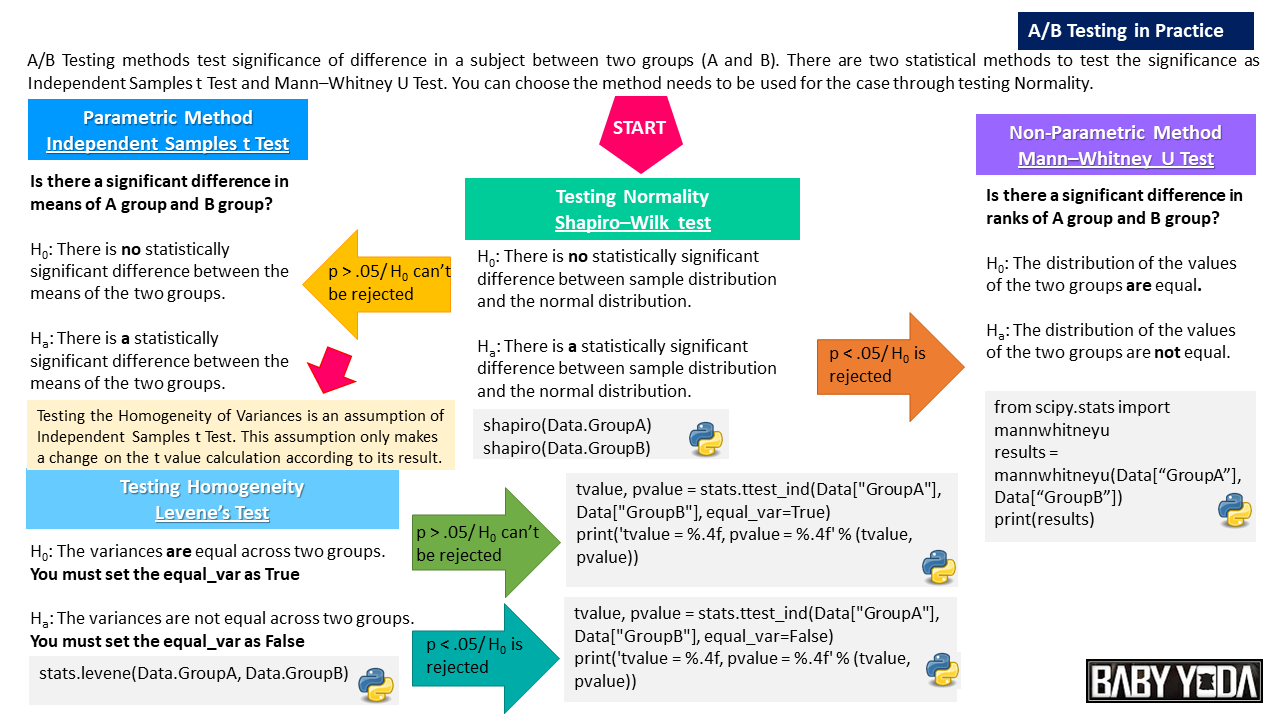

# Importación

In [1]:
#Librerias
import pandas as pd
import numpy as np
import math
import scipy.stats as scs
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')

# Tratamiento

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Primero veremos que tipo de datos nos encontramos en el dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.select_dtypes('object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


Vemos que las variables que son tipo object son strings.En este caso, aunque la columna se detecta como tipo 'object', los valores son en realidad cadenas de caracteres. Se muestra en df.info el tipo de datos como 'object', pero internamente, los valores ya son de tipo 'string'.  
Así que la transformación no le afectará.

Forma para transformar a string los object:  
def object_a_string(df):  
&nbsp;&nbsp;&nbsp;&nbsp;columnas_objeto = df.select_dtypes(include='object').columns  
&nbsp;&nbsp;&nbsp;&nbsp;df[columnas_objeto] = df[columnas_objeto].astype(str)  
&nbsp;&nbsp;&nbsp;&nbsp;return df  
df1 = object_a_string(df)
  
O con pd.convert_dtypes()


### Valores nulos:

In [6]:
df.isnull().sum().sum()

0

### Valores duplicados:

In [7]:
df.duplicated().sum().sum()

0

# A|B testing

## Un poquito de teoría

El A/B testing se aplica cuando se quiere tomar decisiones basadas en datos empíricos y comparar el impacto de diferentes tratamientos o versiones en una métrica de interés.  
Al dividir a los participantes o elementos en `dos grupos`, uno expuesto al tratamiento A y otro al tratamiento B, es posible comparar las diferencias en las métricas entre ambos grupos y determinar si existe una diferencia estadísticamente significativa.  
Permite obtener información precisa sobre qué cambios son más efectivos y respaldar la toma de decisiones informada.
Algunos ejemplos de casos en los que se aplica el A/B testing son:  
  
- Pruebas de diseño de páginas web: Se comparan diferentes diseños de una página web para evaluar cuál genera mayor tasa de conversión o tiempo de permanencia.  
  
- Pruebas de campañas publicitarias: Se comparan diferentes mensajes o creatividades en una campaña publicitaria para determinar cuál tiene un mayor impacto en términos de clics, conversiones o ventas.  
  
- Pruebas de precios: Se comparan diferentes niveles de precios para evaluar cuál genera mayores ingresos o tasas de conversión.  
  
- Pruebas de características de productos: Se comparan diferentes características o funcionalidades de un producto para evaluar cuál es más atractiva o tiene mayor aceptación entre los usuarios.  

**A/B testing resumen pasos generales**:

1. Verificar la normalidad: Aplicar el test de Shapiro-Wilk u otros métodos para evaluar la normalidad de los datos.
2. Si los datos no son normales: Utilizar pruebas no paramétricas como el test de Mann-Whitney U para comparar las distribuciones de los dos grupos.
3. Si los datos son normales: Verificar la igualdad de varianzas y utilizar el test t o el test t de Welch según corresponda.

**Es decir:**
Primero tenemos que ver si sigue una distribución normal = test de **``Saphiro-Wilk``**:
 - Si su p-valor es <0.05 entonces haremos **``Mann-Whitney U test``**
 - Si su p-valor es >0.05 entonces haremos t test.  
   **``Test t``**: Si los datos siguen una distribución normal, es válido aplicar el test t para comparar las medias de dos grupos en un A/B testing. Sin embargo, es importante tener en cuenta otros supuestos del test t, como la **igualdad de varianzas** en ambos grupos (**homocedasticidad**).  
   - Si la igualdad de varianzas no se cumple, se puede utilizar el **``test t de Welch``**, que es una variante robusta del test t que no requiere la igualdad de varianzas.

https://www.cienciadedatos.net/documentos/17_mann%E2%80%93whitney_u_test

## Balance

  * Meses impares (A) contra meses pares (B).
  * Estado civil `'marital'` (A) contra `'single'` (B).
  * Trabajo `'unemployed'` (A) contra `'technician'` (B).
  * Duración por debajo de la media de dicha variable (A) contra por encima de la mediana de dicha variable (B).
  * Variable `campaign` por debajo de la mediana de dicha variable (A) contra por encima de la mediana de dicha variable (B).

Lo primero tenemos que comprobar si la variable objetivo sigue una distribución normal o no, en este caso 'BALANCE':

In [8]:
# Requerimientos
from scipy.stats import shapiro
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(df['balance'])
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Como el resultado a inferior al nivel de significancia mínimo requerido ($0.05$), rechazamos la hipótesis nula y por tanto podemos afirmar que la distribución de balance de cuentas de los datos **no** sigue una distribución normal. De este modo, no nos queda más remedio que usar el test de *Mann-Whitney*:

### 1/ Estudie si existe diferencia significativa de media entre: Meses impares (A) contra meses pares (B).

In [9]:
# Requerimientos
from scipy.stats import mannwhitneyu

# Comprobamos hipótesis nula
A = df[~df['month'].isin(["feb", "apr", "jun", "aug", "oct", "dec"])] ['balance'] #Meses impares
B = df[df['month'].isin(["feb", "apr", "jun", "aug", "oct", "dec"])] ['balance'] #Meses pares
MW_test = mannwhitneyu(A, B)

# Mostramos resultado
print(f"El p-valor obtenido en el test de de Mann-Whitney U es de {MW_test.pvalue}")

El p-valor obtenido en el test de de Mann-Whitney U es de 1.3038963622958427e-17


Con base en las hipótesis establecidas y el resultado del test de Mann-Whitney U, podemos interpretar lo siguiente:  
  
Hipótesis nula (H0): Las medianas de las muestras A y B son iguales.  
Hipótesis alternativa (H1): Las medianas de las muestras A y B son diferentes.  
  
p-valor<0,05: Rechazamos Hipotesis nula  
Concluimos que hay evidencia estadística para afirmar que las medianas de las muestras A y B son diferentes.  
  
En resumen, el resultado indica que los meses impares y los meses pares tienen diferencias significativas en términos de la variable "balance".

*Al igual que ocurre con muchos test no paramétricos, el test de Mann–Whitney–Wilcoxon es menos potente que el t-test (tienen menos probabilidad de rechazar la H0
cuando realmente es falsa) ya que ignora valores extremos. En el caso de los t-test, al trabajar con medias, si los tienen en cuenta. Esto hace a su vez que el test de Mann–Whitney–Wilcoxon sea una prueba más robusta que los t-test. En concreto, la perdida de potencia es del 5%.*

https://rowannicholls.github.io/python/statistics/hypothesis_testing/mann_whitney_u_test.html

Una forma de representar valores no paramétricos puede ser con boxplot + scatterplot, o con violinplots.

**MATPLOTLIB**: boxplot + scatter:

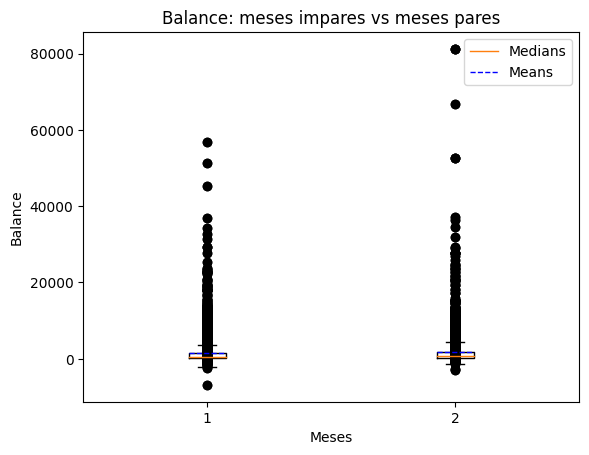

In [10]:
meanprops = {'color': 'b'}
bp = plt.boxplot([A, B], showmeans=True, meanline=True, meanprops=meanprops)
# Scatterplot for treatment 1
y =A
plt.scatter(np.zeros(len(y)) + 1, y, c='k')
# Scatterplot for treatment 2
y = B
plt.scatter(np.ones(len(y)) + 1, y, c='k')
# Tile and labels
plt.title('Balance: meses impares vs meses pares')
plt.xlabel('Meses')
plt.ylabel('Balance')
# Legend
plt.legend([bp['medians'][0], bp['means'][0]], ['Medians', 'Means'])

### 2/ Estudie si existe diferencia significativa de media entre: Estado civil `'married'` (A) contra `'single'` (B).
He corregido marital por married porque no aparece el valor marital como tal en la variable marital.


In [11]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [12]:
# Comprobamos hipótesis nula
A = df[~df['marital'].isin(["married"])] ['balance'] 
B = df[~df['marital'].isin(["single"])] ['balance'] 
MW_test = mannwhitneyu(A, B)

# Mostramos resultado
print(f"El p-valor obtenido en el test de de Mann-Whitney U es de {MW_test.pvalue}")

El p-valor obtenido en el test de de Mann-Whitney U es de 0.09434297071820914


Conclusión: Este p-valor indica que no hay evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia significativa en las medianas de los grupos estado marital single y married.

**MATPLOTLIB**: boxplot + scatter:

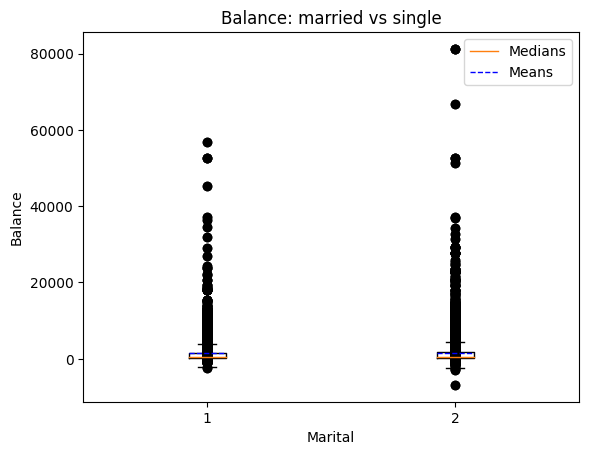

In [13]:
meanprops = {'color': 'b'}
bp = plt.boxplot([A, B], showmeans=True, meanline=True, meanprops=meanprops)
# Scatterplot for treatment 1
y =A
plt.scatter(np.zeros(len(y)) + 1, y, c='k')
# Scatterplot for treatment 2
y = B
plt.scatter(np.ones(len(y)) + 1, y, c='k')
# Tile and labels
plt.title('Balance: married vs single')
plt.xlabel('Marital')
plt.ylabel('Balance')
# Legend
plt.legend([bp['medians'][0], bp['means'][0]], ['Medians', 'Means'])

**SEABORN**: Boxplot sencillo:

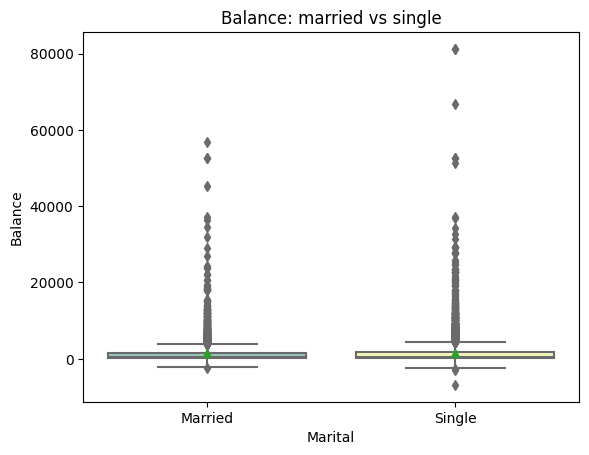

In [19]:
import seaborn as sns
# Concatenar los datos en un DataFrame
data = pd.concat([A.rename('Married'), B.rename('Single')], axis=1)

# Graficar el boxplot y los puntos
sns.boxplot(data=data, showmeans=True, palette = "Set3")
# Configurar título y etiquetas de los ejes
plt.title('Balance: married vs single')
plt.xlabel('Marital')
plt.ylabel('Balance')

# Mostrar el gráfico
plt.show()

In [ ]:
# Concatenar los datos en un DataFrame
data = pd.concat([A.rename('Meses Impares'), B.rename('Meses Pares')], axis=1)

# Graficar el boxplot y los puntos
sns.boxplot(data=data, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
            flierprops={"marker":"x", "markerfacecolor":"red", "markeredgecolor":"red"})
sns.stripplot(data=data, jitter=True, color='black')

# Configurar título y etiquetas de los ejes
plt.title('Balance de meses impares vs meses pares')
plt.xlabel('Meses')
plt.ylabel('Balance')

# Mostrar el gráfico
plt.show()